In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data2.txt', sep=",", header=None,names=["Size(squarefeet)", "Num of Bedrooms","Price"])
#print(data)

In [3]:
x = data.iloc[:, 0:2]
y = data.iloc[:, 2:3]
theta = np.matrix(np.array([0,0,0]))
#print(y)

In [4]:
def featureNormalize(X):
    NormalizedX = X.copy() #copy of original features
    Mean = np.zeros(X.shape[1]) #initialize mean array
    StandardDeviation = np.zeros(X.shape[1]) #initialize standard deviation array
    
    Mean = np.mean(X, axis=0) # mean of both features(Size and Bedrooms) axis=0 calculates mean columnwise
    StandardDeviation = np.std(X, axis=0) #Standard deviation of both features(Size and Bedrooms) axis=0 calculates mean columnwise
    print("Mean:")
    print(Mean)
    
    print("Standard Deviation:")
    print(StandardDeviation)
    
    NormalizedX = (X - Mean) / StandardDeviation # subtract mean divide by standard deviation
    
    return NormalizedX, Mean,StandardDeviation


In [5]:
Normalizedfeatures, Mean, StandardDeviation = featureNormalize(x)

Mean:
Size(squarefeet)    2000.680851
Num of Bedrooms        3.170213
dtype: float64
Standard Deviation:
Size(squarefeet)    786.202619
Num of Bedrooms       0.752843
dtype: float64


In [6]:
Normalizedfeatures.insert(0, 'X0', 1)
#print(Normalizedfeatures)


In [7]:
def costFunction(x, y, theta):
    meanErrorSquared = np.power(((x * theta.T) - y), 2) #(h0 -y)^2
    return np.sum(meanErrorSquared) / (2 * len(x)) # sum of mean error squared * 1/2m
def gradientDescent(x, y, theta, alpha, iterations):
    temp = np.matrix(np.zeros(theta.shape)) #copy of theta matrix with value 0 
    featureCount = int(theta.ravel().shape[1]) # feature count including dummy X0 or number of thetas values
    costArray = np.zeros(iterations) #initialize cost array with zeros
    
    for a in range(iterations):
        error = (x * theta.T) - y #predicted- actual or h0 - y 
        for b in range(featureCount):
            derivative = np.multiply(error, x[:,b]) #error * feature value or (h0 - y)x
            temp[0,b] = theta[0,b] - ((alpha / len(x)) * np.sum(derivative)) #UpdatedTheta= PrevTheta - ((alpha/m) * sum of derivative )   
        theta = temp #update theta
        costArray[a] = costFunction(x, y, theta) 
        
    return theta, costArray

In [8]:
Normalizedfeatures.shape,y.shape,theta.shape
mat1 = np.matrix(Normalizedfeatures.values)
mat2 = np.matrix(y.values)
#print(mat1)


In [9]:
iterations = 50
alpha = 0.3
gd, cost = gradientDescent(mat1, mat2, theta, alpha, iterations)
gd

matrix([[340412.67472886, 109398.9215574 ,  -6529.4475725 ]])

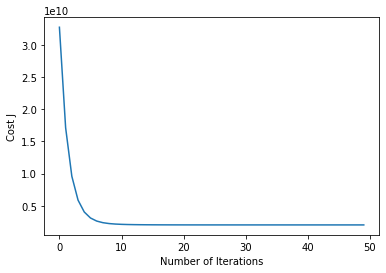

In [10]:
plt.plot(cost)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.show()

In [11]:
NormalizedTestData=(np.array([1650,3])-Mean)/StandardDeviation # normalize Test Data
NormalizedTestData=np.hstack((np.ones(1), NormalizedTestData)) #insert dummy X0
Price=NormalizedTestData.dot(gd.T) #Multiply two vectors Test Data and theta

print("Price for house with 1650 squarefeet and 3 bedrooms using Gradient Descent")
print(Price)

Price for house with 1650 squarefeet and 3 bedrooms using Gradient Descent
[[293092.22223181]]


### Normal Equation

In [12]:
NE_x = data.iloc[:, 0:2]
NE_y = data.iloc[:, 2:3]
NE_x.insert(0, 'X0', 1)
#print(NE_x)

In [13]:
def normalEquation(X,y):
    X_TransposeX = np.dot(X.T,X) #X transpose *X
    inv_X = np.linalg.pinv(X_TransposeX) #X transpose *X INVERSE
    X_y = np.dot(X.T,y) #X transpose * y
    theta = np.dot(inv_X,X_y)
    return theta

In [14]:
NE_theta = normalEquation(NE_x,NE_y)

In [15]:
NE_TestData=(np.array([1,1650,3]))
#print(NE_theta)
NE_Price=NE_TestData.dot(NE_theta)
print("Price for house with 1650 squarefeet and 3 bedrooms using Normal Equation")
print(NE_Price)

Price for house with 1650 squarefeet and 3 bedrooms using Normal Equation
[293081.47383529]
